In [1]:
from fastai2.torch_basics import *
from fastai2.layers import *
from fastai2.data.all import *
from fastai2.data.block import *
from fastai2.optimizer import *
from fastai2.learner import *
from fastai2.metrics import *
from fastai2.vision.core import *
from fastai2.vision.data import *
from fastai2.callback.all import *
from fastai2.vision.all import *

path=untar_data(URLs.IMAGENETTE_320)
files = get_image_files(path)

In [18]:

class DoubleImage(Tuple):
    def show(self, ctx=None, **kwargs): 
        if len(self) == 3:
            img1,img2,title = self
        else:
            img1,img2 = self
            title='NNN/AAA'
        if not isinstance(img1, Tensor):
            if img2.size != img1.size: img2 = img2.resize(img1.size)
            t1,t2 = tensor(img1),tensor(img2)
            t1,t2 = t1.permute(2,0,1),t2.permute(2,0,1)
        else: t1,t2 = img1,img2
        line = t1.new_zeros(t1.shape[0], t1.shape[1], 10)
        line0 = t1.new_ones(t1.shape[0], t1.shape[1], 30)
        line00 = t1.new_ones(t1.shape[0], t1.shape[1], 30)
        
        t2 = t2.long() #NOTE: If not causees an error of type not being long but char (unsigned int??)
        t2 = TensorImage(t2)
        print("*************************************************")
        mix2img = torch.cat([t1, line00, t2], dim=2)
        return show_image(mix2img, title=title, ctx=ctx)

class JustDoDoble(Transform):
    def encodes(self, x:PILImage):
        img2 = x.convert('LA').convert('RGB')
        img2 = PILImage(img2)
        return DoubleImage(x, img2)
    def decodes(self, x): #:TensorImage):
        print(f"decodes of JustDoDouble {type(x)}")
        return x #[0]

imagenet = DataBlock(blocks = (ImageBlock(),CategoryBlock),
                  get_items = get_image_files,
                  splitter = GrandparentSplitter(),
                  item_tfms=[JustDoDoble, CropPad(340)],
                  get_y = parent_label)

imagenet.summary(path)

Setting-up type transforms pipelines
Found 13394 items
2 datasets of sizes 9469,0
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/tyoc213/.fastai/data/imagenette2-320/train/n03028079/n03028079_71737.JPEG
    applying PILBase.create gives
      PILImage mode=RGB size=320x441
  Pipeline: parent_label -> Categorize
    starting from
      /home/tyoc213/.fastai/data/imagenette2-320/train/n03028079/n03028079_71737.JPEG
    applying parent_label gives
      n03028079
    applying Categorize gives
      TensorCategory(4)

Final sample: (PILImage mode=RGB size=320x441, TensorCategory(4))


Setting up after_item: Pipeline: JustDoDoble -> CropPad -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: JustDoDoble -> CropPad -> ToTensor
    starting from
      (PILImage m

In [19]:
dls = imagenet.dataloaders(path)
dls.one_batch()

((TensorImage([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
  
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
  
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
    

decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorCategory'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorCategory'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorCategory'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorCategory'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorCategory'>
decodes of

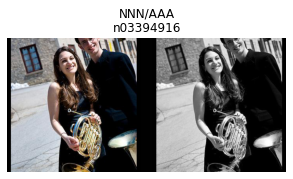

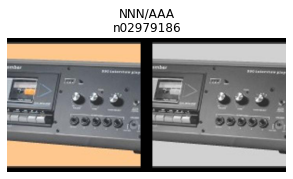

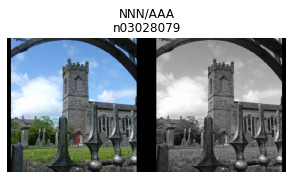

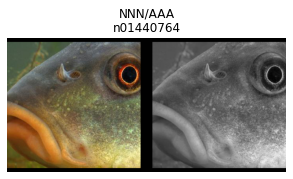

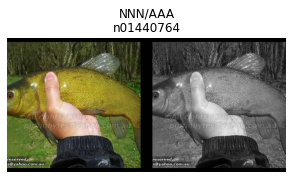

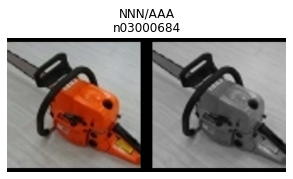

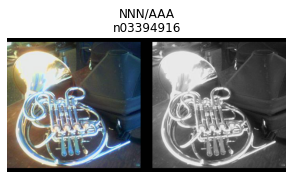

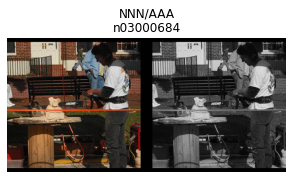

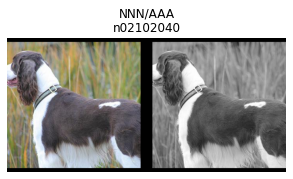

In [20]:
dls.show_batch()